In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/My Drive/df_cross_yf.csv')

In [ ]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'reviewer_id', 'preference', 'listing_id',
       'host_is_superhost', 'latitude', 'longitude', 'price',
       'number_of_reviews_ltm', 'calculated_host_listings_count',
       'nearby_sites_rating', 'nearest_station_dist',
       'host_response_time_cross_rate', 'item_factor_0', 'user_factor_0',
       'item_factor_1', 'user_factor_1', 'item_factor_2', 'user_factor_2',
       'item_factor_3', 'user_factor_3', 'item_factor_4', 'user_factor_4',
       'item_factor_5', 'user_factor_5', 'item_factor_6', 'user_factor_6',
       'item_factor_7', 'user_factor_7', 'item_factor_8', 'user_factor_8',
       'item_factor_9', 'user_factor_9'],
      dtype='object')

In [ ]:
y = df.preference

In [ ]:
df = df.drop(columns=["Unnamed: 0","Unnamed: 0.1"])

In [ ]:
df.columns

Index(['reviewer_id', 'preference', 'listing_id', 'host_is_superhost',
       'latitude', 'longitude', 'price', 'number_of_reviews_ltm',
       'calculated_host_listings_count', 'nearby_sites_rating',
       'nearest_station_dist', 'host_response_time_cross_rate',
       'item_factor_0', 'user_factor_0', 'item_factor_1', 'user_factor_1',
       'item_factor_2', 'user_factor_2', 'item_factor_3', 'user_factor_3',
       'item_factor_4', 'user_factor_4', 'item_factor_5', 'user_factor_5',
       'item_factor_6', 'user_factor_6', 'item_factor_7', 'user_factor_7',
       'item_factor_8', 'user_factor_8', 'item_factor_9', 'user_factor_9'],
      dtype='object')

In [ ]:
X = df.drop(columns=["reviewer_id","listing_id"])

In [ ]:
X.drop(columns=["preference"],inplace=True)

In [ ]:
X.head()

,host_is_superhost,latitude,longitude,price,number_of_reviews_ltm,calculated_host_listings_count,nearby_sites_rating,nearest_station_dist,host_response_time_cross_rate,item_factor_0,user_factor_0,item_factor_1,user_factor_1,item_factor_2,user_factor_2,item_factor_3,user_factor_3,item_factor_4,user_factor_4,item_factor_5,user_factor_5,item_factor_6,user_factor_6,item_factor_7,user_factor_7,item_factor_8,user_factor_8,item_factor_9,user_factor_9
0,0,1.44255,103.79580,79.0,0,2,0.995731,0.617762,2.0,-0.080090,-0.045423,-0.072907,0.119669,0.077274,0.045258,0.037663,0.085235,-0.038879,0.009194,0.038809,-0.038233,0.030629,-0.072737,0.032604,0.082893,0.287333,-0.098187,0.089866,0.021846
1,0,1.33235,103.78521,80.0,0,1,1.269606,0.399696,0.0,0.081554,-0.049855,-0.105953,0.044933,-0.116901,0.131527,-0.017028,0.111009,-0.086785,-0.002848,-0.020847,0.074678,-0.037473,-0.052219,-0.075626,-0.012367,0.034406,0.001945,0.085947,0.008726
2,0,1.33235,103.78521,80.0,0,1,1.269606,0.399696,0.0,0.081554,-0.045758,-0.105953,-0.057649,-0.116901,-0.014033,-0.017028,0.041884,-0.086785,0.181634,-0.020847,-0.046492,-0.037473,-0.133720,-0.075626,-0.118024,0.034406,0.067946,0.085947,-0.158080
3,0,1.33235,103.78521,80.0,0,1,1.269606,0.399696,0.0,0.081554,0.028973,-0.105953,0.145273,-0.116901,0.066612,-0.017028,-0.063751,-0.086785,0.176873,-0.020847,-0.142651,-0.037473,0.024285,-0.075626,0.007321,0.034406,0.025454,0.085947,0.055499
4,0,1.33235,103.78521,80.0,0,1,1.269606,0.399696,0.0,0.081554,-0.055366,-0.105953,-0.037461,-0.116901,0.030717,-0.017028,0.059124,-0.086785,0.139225,-0.020847,0.046353,-0.037473,-0.032285,-0.075626,-0.020036,0.034406,0.008693,0.085947,-0.050897


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
import numpy as np

def mse(y_predicted, y_true):
  return np.mean(np.square(y_predicted - y_true))
mse_training = mse(lr.predict(X_train), y_train)
mse_testing = mse(lr.predict(X_test), y_test)
print("training mse: {}, testing mse: {}".format(mse_training, mse_testing))
print("training rmse: {}, testing rmse: {}".format(np.sqrt(mse_training), np.sqrt(mse_testing)))

training mse: 0.024313141103912996, testing mse: 0.02438069313635963
training rmse: 0.1559267170946435, testing rmse: 0.15614318152375284


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [ ]:
forest = RandomForestRegressor(random_state = 1, n_estimators = 10, min_samples_split = 2)
params = {
            'max_depth': [5, 10, 20],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 5]
        }

rf = GridSearchCV(forest, params, cv = 3, verbose = 1, n_jobs = -1)
rf.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  9.2min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=None,
                                             oob_score=False, random_state=1,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-

In [ ]:
print('best parameters: ', rf.best_params_)

best parameters:  {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}


In [ ]:
y_train_pred = rf.predict(X_train)
y_pred = rf.predict(X_test)
mse_training = mse(rf.predict(X_train), y_train)
mse_testing = mse(rf.predict(X_test), y_test)
print("training mse: {}, testing mse: {}".format(mse_training, mse_testing))
print("training rmse: {}, testing rmse: {}".format(np.sqrt(mse_training), np.sqrt(mse_testing)))

training mse: 0.02000335159335936, testing mse: 0.02188765627153034
training rmse: 0.141433205412871, testing rmse: 0.1479447743975107


# XGBRegressor

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgb1 = XGBRegressor()
parameters = {
              'objective':['reg:linear','reg:squarederror'],
              'learning_rate': [.03, 0.05], #so called `eta` value
              'max_depth': [5, 6, 7],
              'n_estimators': [10,20]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train,y_train)


NameError: ignored

In [ ]:
y_train_pred = xgb_grid.predict(X_train)
y_pred = xgb_grid.predict(X_test)
mse_training = mse(xgb_grid.predict(X_train), y_train)
mse_testing = mse(xgb_grid.predict(X_test), y_test)
print("training mse: {}, testing mse: {}".format(mse_training, mse_testing))
print("training rmse: {}, testing rmse: {}".format(np.sqrt(mse_training), np.sqrt(mse_testing)))

training mse: 0.03615596960467331, testing mse: 0.03674544708752492
training rmse: 0.1901472313883989, testing rmse: 0.19169101984058856


In [ ]:
xgb_grid.best_estimator_.feature_importances_

array([0.7384785 , 0.00982139, 0.01821585, 0.02321639, 0.01683902,
       0.04075652, 0.01497753, 0.01440454, 0.01743021, 0.01170048,
       0.00197531, 0.00652407, 0.00268669, 0.00875849, 0.00350802,
       0.00579854, 0.00300764, 0.00794917, 0.00358986, 0.00622467,
       0.00392662, 0.00725924, 0.00317752, 0.00686934, 0.00344898,
       0.00560186, 0.00314865, 0.0075481 , 0.00315689], dtype=float32)

<BarContainer object of 29 artists>

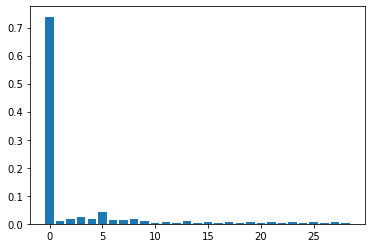

In [ ]:
from matplotlib import pyplot
pyplot.bar(range(len(xgb_grid.best_estimator_.feature_importances_)), xgb_grid.best_estimator_.feature_importances_)